In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Get raw data
def get_raw_data(path):
    df = pd.read_excel(path)
    #print(df.head(3))
    return df

In [3]:
# Load data
raw_data = get_raw_data('./data/raw_data/cascaded_use_case_data.xlsx')

In [4]:
# Review the data
raw_data.describe()

,Vindhastighet Nilsebu,Lufttemp. Nilsebu,Vindretning Nilsebu,RelHum Nilsebu,Vannstand Lyngsåna,Vanntemp. Hiafossen,Vannstand Hiafossen,Lufttemp Fister,Nedbør Fister,Q_Lyngsvatn_overlop,...,SNOW_MELT_HBV,SNOW_SWE_HBV,Evap_HBV,SOIL_WAT_HBV,GR_WAT_HBV,Q_Kalltveit_uten_tapping,Q_HBV_mean,Q_Lyngsaana,Vanntemp. Lyngsåna,Vanntemp. Kalltveit elv
count,62955.000000,63102.000000,63079.000000,63079.000000,50380.000000,50192.000000,50192.000000,63288.000000,63288.000000,63286.000000,...,29595.000000,29595.000000,29595.000000,29595.000000,29595.000000,63288.000000,31241.000000,63288.000000,63283.000000,50316.000000
mean,-11.359088,3.636294,213.033360,64.444010,0.735474,6.242513,1.078482,8.811811,0.215365,0.035255,...,0.088353,187.212226,0.037146,71.159486,15.950311,5.589386,5.177136,2.259291,6.402902,7.309757
std,373.072147,6.919231,113.673486,43.178686,0.182148,5.352072,0.158591,5.909750,0.746016,0.742100,...,0.159276,248.752510,0.052701,18.556167,11.308697,7.764969,6.595386,3.344124,5.343528,5.477978
min,-7999.000000,-20.700000,-99.900000,-99.900000,0.331000,-0.200000,0.849000,-11.800000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.261850,0.620583,0.000000,0.006219,0.000000,-0.773633,0.000000
25%,5.200000,-0.800000,133.200000,51.500000,0.606000,1.200000,0.972000,4.600000,0.000000,0.000000,...,0.000000,3.225878,0.000000,64.480745,7.919268,1.299561,1.322910,0.469784,1.415820,2.400000
50%,6.100000,3.100000,215.600000,82.600000,0.714000,4.900000,1.029000,8.400000,0.000000,0.000000,...,0.020140,79.286333,0.006458,79.571125,13.409707,3.496592,3.363310,1.058914,5.084766,6.375000
75%,7.500000,8.600000,325.900000,96.700000,0.847000,11.200000,1.136000,13.200000,0.000000,0.000000,...,0.106016,284.564780,0.060809,83.691862,21.733892,6.673359,6.299936,2.529453,11.600000,12.175000
max,22.100000,27.200000,360.000000,99.700000,1.494000,19.900000,2.017000,32.400000,21.598444,22.397800,...,1.380904,1006.826726,0.322221,84.942103,102.194142,110.256270,137.051147,55.227400,19.400000,22.850000


In [5]:
# What dataset contains
print(raw_data.columns)

Index(['Datetime', 'Vindhastighet Nilsebu', 'Lufttemp. Nilsebu',
       'Vindretning Nilsebu', 'RelHum Nilsebu', 'Vannstand Lyngsåna',
       'Vanntemp. Hiafossen', 'Vannstand Hiafossen', 'Lufttemp Fister',
       'Nedbør Fister', 'Q_Lyngsvatn_overlop', 'Q_tapping',
       'Vannstand Kalltveit', 'Q_Kalltveit', 'Vanntemp. Kalltveit kum',
       'Nedbør Nilsebu', 'Vanntemp. Hiavatn', 'Vannstand Hiavatn',
       'Vanntemp. Musdalsvatn', 'Vannstand Musdalsvatn',
       'Vanntemp. Musdalsvatn nedstrøms', 'Vannstand Musdalsvatn nedstrøms',
       'Vanntemp. Viglesdalsvatn', 'Vannstand Viglesdalsvatn', 'Q_HBV',
       'PRECIP_HBV', 'TEMP_HBV', 'SNOW_MELT_HBV', 'SNOW_SWE_HBV', 'Evap_HBV',
       'SOIL_WAT_HBV', 'GR_WAT_HBV', 'Q_Kalltveit_uten_tapping', 'Q_HBV_mean',
       'Q_Lyngsaana', 'Vanntemp. Lyngsåna', 'Vanntemp. Kalltveit elv'],
      dtype='object')


In [6]:
# Find amount of null values in dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 37 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Datetime                         63288 non-null  datetime64[ns]
 1   Vindhastighet Nilsebu            62955 non-null  float64       
 2   Lufttemp. Nilsebu                63102 non-null  float64       
 3   Vindretning Nilsebu              63079 non-null  float64       
 4   RelHum Nilsebu                   63079 non-null  float64       
 5   Vannstand Lyngsåna               50380 non-null  float64       
 6   Vanntemp. Hiafossen              50192 non-null  float64       
 7   Vannstand Hiafossen              50192 non-null  float64       
 8   Lufttemp Fister                  63288 non-null  float64       
 9   Nedbør Fister                    63288 non-null  float64       
 10  Q_Lyngsvatn_overlop              63286 non-null  float64  

In [7]:
inflow_Kalltveit = raw_data[['Q_Kalltveit']]
inflow_Kalltveit.index = raw_data['Datetime']
inflow_Kalltveit.describe()

,Q_Kalltveit
count,63288.000000
mean,6.509245
std,7.565526
min,0.000000
25%,2.683190
50%,4.097010
75%,7.141195
max,110.256270


In [8]:
inflow_Kalltveit_uten_tapping =  raw_data[['Q_Kalltveit_uten_tapping']]
inflow_Kalltveit_uten_tapping.index = raw_data['Datetime']
inflow_Kalltveit_uten_tapping.describe()

,Q_Kalltveit_uten_tapping
count,63288.000000
mean,5.589386
std,7.764969
min,0.000000
25%,1.299561
50%,3.496592
75%,6.673359
max,110.256270


In [9]:
raw_data.tail(30)

,Datetime,Vindhastighet Nilsebu,Lufttemp. Nilsebu,Vindretning Nilsebu,RelHum Nilsebu,Vannstand Lyngsåna,Vanntemp. Hiafossen,Vannstand Hiafossen,Lufttemp Fister,Nedbør Fister,...,SNOW_MELT_HBV,SNOW_SWE_HBV,Evap_HBV,SOIL_WAT_HBV,GR_WAT_HBV,Q_Kalltveit_uten_tapping,Q_HBV_mean,Q_Lyngsaana,Vanntemp. Lyngsåna,Vanntemp. Kalltveit elv
63258,2022-03-20 18:00:00,7.9,1.9,102.5,43.7,NaN,NaN,NaN,7.6,0.000000,...,0.169220,454.898800,0.002581,84.632722,13.756803,2.162487,2.228524,0.597819,2.108984,3.475
63259,2022-03-20 19:00:00,6.7,1.4,296.6,42.0,NaN,NaN,NaN,8.2,0.000000,...,0.136109,454.751065,0.002062,84.631498,13.745685,2.172259,2.231971,0.588713,1.904297,3.075
63260,2022-03-20 20:00:00,6.4,0.7,346.0,43.5,NaN,NaN,NaN,8.1,0.000000,...,0.091424,454.651831,0.001326,84.630735,13.691096,2.166936,2.226760,0.591183,1.691797,2.800
63261,2022-03-20 21:00:00,14.6,0.1,107.8,58.3,NaN,NaN,NaN,6.9,0.000000,...,0.058766,454.588045,0.000692,84.630405,13.605482,2.185343,2.211974,0.579485,1.486328,2.525
63262,2022-03-20 22:00:00,6.4,0.1,328.4,40.1,NaN,NaN,NaN,6.0,0.000000,...,0.058662,454.524373,0.000694,84.630073,13.521140,2.172441,2.192663,0.580923,1.269141,2.375
63263,2022-03-20 23:00:00,8.1,0.2,170.5,41.8,NaN,NaN,NaN,6.1,0.000000,...,0.063013,454.455977,0.000802,84.629661,13.442405,2.131554,2.173450,0.559914,1.033594,2.275
63264,2022-03-21 00:00:00,8.0,-0.2,44.9,49.0,NaN,NaN,NaN,4.1,0.000000,...,0.045096,454.407029,0.000376,84.629563,13.347434,2.098602,2.139189,0.523529,0.824023,2.125
63265,2022-03-21 01:00:00,6.3,-0.6,106.2,48.5,NaN,NaN,NaN,4.3,0.000000,...,0.031067,454.373308,0.000000,84.629755,13.240284,2.054222,2.108047,0.425647,0.629687,1.950
63266,2022-03-21 02:00:00,10.3,-0.7,105.3,49.4,NaN,NaN,NaN,4.7,0.000000,...,0.027721,454.343219,0.000000,84.629926,13.131572,2.002673,2.068161,0.314453,0.525391,1.825
63267,2022-03-21 03:00:00,8.9,-0.5,104.9,47.7,NaN,NaN,NaN,3.8,0.000000,...,0.034279,454.306012,0.000056,84.630081,13.031012,1.796930,2.022807,0.263165,0.461719,1.650


In [10]:
raw_data[["Q_Kalltveit", "Nedbør Nilsebu", "Q_Lyngsaana"]].describe()

,Q_Kalltveit,Nedbør Nilsebu,Q_Lyngsaana
count,63288.000000,63288.000000,63288.000000
mean,6.509245,0.326407,2.259291
std,7.565526,1.237064,3.344124
min,0.000000,0.000000,0.000000
25%,2.683190,0.000000,0.469784
50%,4.097010,0.000000,1.058914
75%,7.141195,0.098519,2.529453
max,110.256270,30.000000,55.227400


In [11]:
raw_data[["Q_Kalltveit", "Nedbør Nilsebu", "Q_Lyngsaana"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63288 entries, 0 to 63287
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Q_Kalltveit     63288 non-null  float64
 1   Nedbør Nilsebu  63288 non-null  float64
 2   Q_Lyngsaana     63288 non-null  float64
dtypes: float64(3)
memory usage: 1.4 MB


c:\Code\hydro-ml\my_env\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


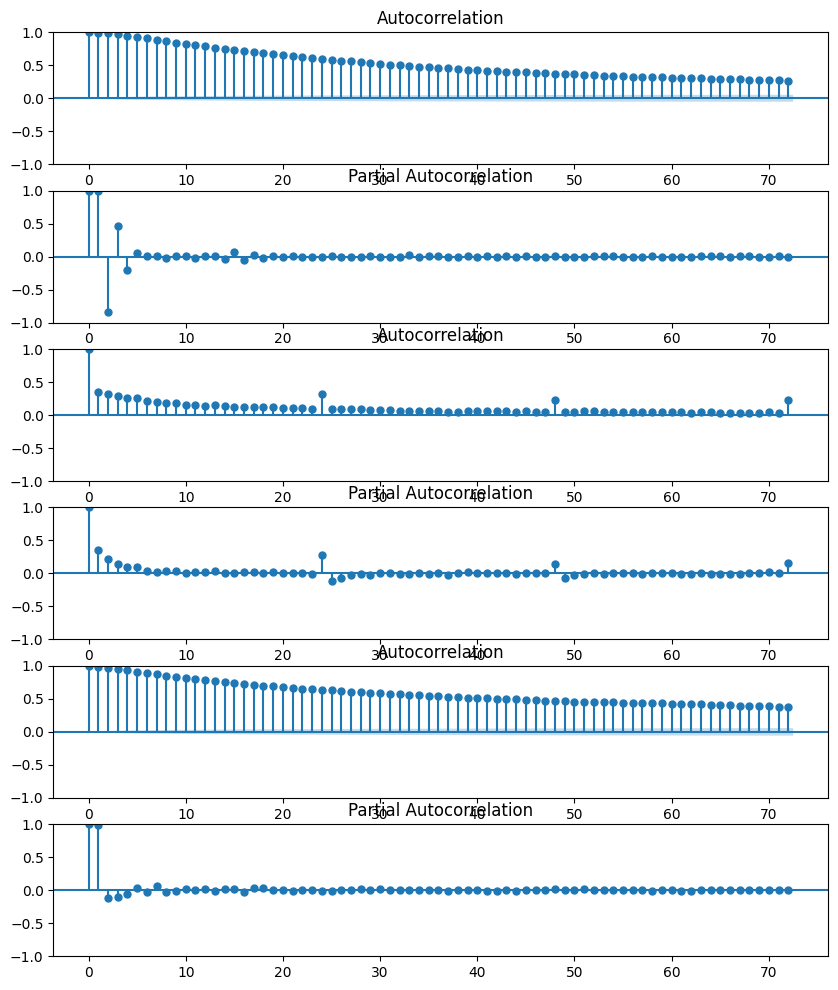

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
lag = 72
# Compute the ACF and PACF for the 'inflow' variable
inflow_acf = sm.tsa.stattools.acf(raw_data['Q_Kalltveit'], nlags=lag)
inflow_pacf = sm.tsa.stattools.pacf(raw_data['Q_Kalltveit'], nlags=lag)

# Compute the ACF and PACF for the 'precipitation' variable
precipitation_acf = sm.tsa.stattools.acf(raw_data['Nedbør Nilsebu'], nlags=lag)
precipitation_pacf = sm.tsa.stattools.pacf(raw_data['Nedbør Nilsebu'], nlags=lag)
logger_pacf = sm.tsa.stattools.pacf(raw_data['Q_Lyngsaana'], nlags=lag)

# Plot the ACF and PACF for 'inflow' and 'precipitation'
fig, ax = plt.subplots(nrows=6, figsize=(10,12))
sm.graphics.tsa.plot_acf(raw_data['Q_Kalltveit'], lags=lag, ax=ax[0])
sm.graphics.tsa.plot_pacf(raw_data['Q_Kalltveit'], lags=lag, ax=ax[1])
sm.graphics.tsa.plot_acf(raw_data['Nedbør Nilsebu'], lags=lag, ax=ax[2])
sm.graphics.tsa.plot_pacf(raw_data['Nedbør Nilsebu'], lags=lag, ax=ax[3])
sm.graphics.tsa.plot_acf(raw_data['Q_Lyngsaana'], lags=lag, ax=ax[4])
sm.graphics.tsa.plot_pacf(raw_data['Q_Lyngsaana'], lags=lag, ax=ax[5])
plt.show()

In [47]:
from config import load_data
from sklearn.feature_selection import mutual_info_regression

ld = load_data(data_dir="./data/", target_variable='Q_Kalltveit')

var = ['Nedbør Nilsebu', 'Q_Lyngsaana']
X, y = ld.create_lagged_matrix(25, vars_to_lag=var)
# Convert X to a pandas DataFrame
X = pd.DataFrame(X)
y = pd.DataFrame(y)

In [48]:
discrete_features = X.dtypes == int
y = y.values.ravel() # convert y to 1-dimensional array
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
selected_dimension = mi_scores[mi_scores.values >= 1]
selected_dimension

0     3.965049
1     3.228922
2     2.826094
3     2.547248
4     2.340028
5     2.171429
6     2.029706
7     1.912989
8     1.810747
9     1.721881
10    1.644884
11    1.576520
12    1.510609
13    1.462474
14    1.413133
15    1.362525
16    1.322837
17    1.280608
18    1.245226
19    1.209969
50    1.198768
20    1.180290
51    1.148062
21    1.147789
22    1.123823
52    1.106692
23    1.089469
53    1.064739
24    1.056793
54    1.029739
Name: MI Scores, dtype: float64

In [33]:
X[selected_dimension.index]

,0,1,2,3,4,5,6,7,8,9,...,50,20,51,21,22,52,23,53,24,54
0,tensor(46.8514),tensor(41.4611),tensor(36.3013),tensor(31.1735),tensor(26.0996),tensor(21.4556),tensor(17.3950),tensor(14.1905),tensor(11.8753),tensor(10.4556),...,tensor(21.5267),tensor(4.0290),tensor(21.2306),tensor(3.7442),tensor(3.5626),tensor(18.6507),tensor(3.4524),tensor(16.0867),tensor(3.3706),tensor(13.5498)
1,tensor(52.7391),tensor(46.8514),tensor(41.4611),tensor(36.3013),tensor(31.1735),tensor(26.0996),tensor(21.4556),tensor(17.3950),tensor(14.1905),tensor(11.8753),...,tensor(18.6181),tensor(4.3433),tensor(21.5267),tensor(4.0290),tensor(3.7442),tensor(21.2306),tensor(3.5626),tensor(18.6507),tensor(3.4524),tensor(16.0867)
2,tensor(56.8515),tensor(52.7391),tensor(46.8514),tensor(41.4611),tensor(36.3013),tensor(31.1735),tensor(26.0996),tensor(21.4556),tensor(17.3950),tensor(14.1905),...,tensor(24.2787),tensor(4.8561),tensor(18.6181),tensor(4.3433),tensor(4.0290),tensor(21.5267),tensor(3.7442),tensor(21.2306),tensor(3.5626),tensor(18.6507)
3,tensor(56.6254),tensor(56.8515),tensor(52.7391),tensor(46.8514),tensor(41.4611),tensor(36.3013),tensor(31.1735),tensor(26.0996),tensor(21.4556),tensor(17.3950),...,tensor(24.7112),tensor(5.6446),tensor(24.2787),tensor(4.8561),tensor(4.3433),tensor(18.6181),tensor(4.0290),tensor(21.5267),tensor(3.7442),tensor(21.2306)
4,tensor(53.4460),tensor(56.6254),tensor(56.8515),tensor(52.7391),tensor(46.8514),tensor(41.4611),tensor(36.3013),tensor(31.1735),tensor(26.0996),tensor(21.4556),...,tensor(25.2612),tensor(6.7598),tensor(24.7112),tensor(5.6446),tensor(4.8561),tensor(24.2787),tensor(4.3433),tensor(18.6181),tensor(4.0290),tensor(21.5267)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63258,tensor(2.4283),tensor(2.4659),tensor(2.4439),tensor(2.4880),tensor(2.5736),tensor(2.7089),tensor(3.0860),tensor(3.2729),tensor(2.6314),tensor(2.2826),...,tensor(0.4670),tensor(2.7538),tensor(0.4621),tensor(2.7603),tensor(2.7377),tensor(0.4785),tensor(2.7409),tensor(0.4687),tensor(2.7311),tensor(0.4885)
63259,tensor(2.4346),tensor(2.4283),tensor(2.4659),tensor(2.4439),tensor(2.4880),tensor(2.5736),tensor(2.7089),tensor(3.0860),tensor(3.2729),tensor(2.6314),...,tensor(0.4649),tensor(2.7214),tensor(0.4670),tensor(2.7538),tensor(2.7603),tensor(0.4621),tensor(2.7377),tensor(0.4785),tensor(2.7409),tensor(0.4687)
63260,tensor(2.4251),tensor(2.4346),tensor(2.4283),tensor(2.4659),tensor(2.4439),tensor(2.4880),tensor(2.5736),tensor(2.7089),tensor(3.0860),tensor(3.2729),...,tensor(0.4518),tensor(2.6987),tensor(0.4649),tensor(2.7214),tensor(2.7538),tensor(0.4670),tensor(2.7603),tensor(0.4621),tensor(2.7377),tensor(0.4785)
63261,tensor(2.4158),tensor(2.4251),tensor(2.4346),tensor(2.4283),tensor(2.4659),tensor(2.4439),tensor(2.4880),tensor(2.5736),tensor(2.7089),tensor(3.0860),...,tensor(0.4506),tensor(2.6665),tensor(0.4518),tensor(2.6987),tensor(2.7214),tensor(0.4649),tensor(2.7538),tensor(0.4670),tensor(2.7603),tensor(0.4621)


array([[tensor(46.8514), tensor(41.4611), tensor(36.3013), ...,
        tensor(16.0867), tensor(3.3706), tensor(13.5498)],
       [tensor(52.7391), tensor(46.8514), tensor(41.4611), ...,
        tensor(18.6507), tensor(3.4524), tensor(16.0867)],
       [tensor(56.8515), tensor(52.7391), tensor(46.8514), ...,
        tensor(21.2306), tensor(3.5626), tensor(18.6507)],
       ...,
       [tensor(2.4251), tensor(2.4346), tensor(2.4283), ...,
        tensor(0.4621), tensor(2.7377), tensor(0.4785)],
       [tensor(2.4158), tensor(2.4251), tensor(2.4346), ...,
        tensor(0.4670), tensor(2.7603), tensor(0.4621)],
       [tensor(2.4064), tensor(2.4158), tensor(2.4251), ...,
        tensor(0.4649), tensor(2.7538), tensor(0.4670)]], dtype=object)

In [14]:
# Generate some sample data
X_flat = X.to_numpy()
y = y.to_numpy()

In [15]:
X.shape

(63263, 75)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# define standard scaler
scaler = StandardScaler()

In [18]:
import numpy as np
import matplotlib.pyplot as plt


# Standardize the data
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=0.9)
pca_features = pca.fit_transform(X_scaled)
 
print('Shape before PCA: ', X_scaled.shape)
print('Shape after PCA: ', pca_features.shape)
 
pca_df = pd.DataFrame(
    data=pca_features,)

Shape before PCA:  (63263, 75)
Shape after PCA:  (63263, 19)


In [19]:
pca_df['target'] = y
 
pca_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,target
0,9.549021,10.434032,-3.239386,0.051778,4.496242,0.388706,-2.789159,-1.233723,1.958580,3.196868,-1.005363,0.124261,-0.797174,1.340973,-0.854515,0.297536,-0.216236,0.375886,0.251019,52.739071
1,11.197135,11.076193,-3.294839,-0.861184,3.813378,0.746319,-4.979290,-1.355846,2.210179,1.770005,-0.315025,-1.124494,0.041919,0.530843,1.015815,-1.175917,-0.024791,-0.098161,-0.489547,56.851521
2,13.458938,12.920179,-4.501394,0.737444,4.289815,0.603917,-4.022726,4.168755,5.078064,-1.186489,0.809311,-0.374660,-0.616103,-0.852145,1.288798,-0.547315,-0.811536,0.543543,0.229464,56.625359
3,15.380349,13.653741,-4.662169,-0.946826,3.880183,0.868007,-5.334387,1.378247,-1.419321,-3.621027,1.754931,0.033957,3.175053,-2.066230,3.094181,-1.194243,0.144005,-0.481770,-1.326153,53.445961
4,17.348537,14.179273,-4.545706,-1.918878,2.952210,0.718340,-5.909262,3.066310,-2.874792,-2.280178,0.589103,2.488422,1.476971,0.021939,-0.379044,3.815508,0.219405,-0.509051,2.266744,49.823490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63258,-3.879096,-0.131100,0.048942,-0.281091,-0.001006,0.044053,-0.125813,0.070003,-0.008015,0.007736,-0.009510,0.002143,0.002081,0.005315,-0.000422,0.013571,0.000409,-0.005096,-0.002666,2.434570
63259,-3.888824,-0.127705,0.073931,-0.295858,0.002759,0.040340,-0.103045,0.080084,-0.018662,0.012149,-0.003886,-0.007894,0.002289,0.008359,-0.003548,0.005931,0.012602,-0.000956,0.002237,2.425140
63260,-3.898998,-0.126019,0.100893,-0.305839,0.016524,0.038889,-0.080166,0.082296,-0.024417,0.022248,0.006727,-0.005772,-0.002108,0.013602,-0.002123,0.011355,0.001385,0.005144,-0.000377,2.415760
63261,-3.909384,-0.125285,0.128102,-0.309868,0.039137,0.040240,-0.061390,0.078867,-0.019737,0.033268,0.006537,0.004257,-0.009657,0.008650,-0.002257,0.003869,0.002821,-0.005552,-0.000267,2.406400


In [20]:
pca.explained_variance_

array([44.91442219,  6.10376358,  2.5336754 ,  2.02734954,  1.25398306,
        1.12743432,  1.07341456,  0.95068408,  0.80708939,  0.78237701,
        0.72101054,  0.72061287,  0.71721239,  0.70532215,  0.68990447,
        0.67535084,  0.66622897,  0.66434391,  0.64529837])

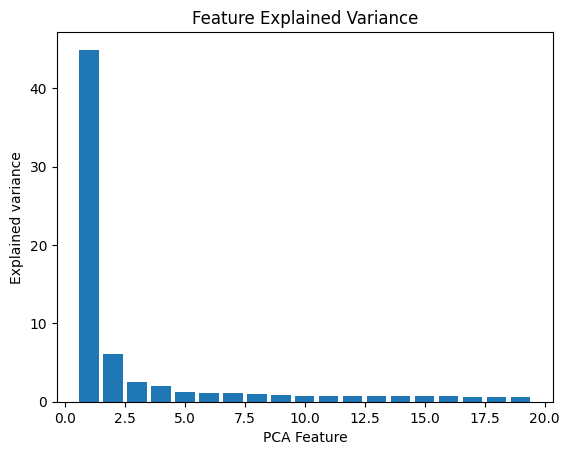

In [21]:
import matplotlib.pyplot as plt 
 
from sklearn.decomposition import PCA

# Bar plot of explained_variance
plt.bar(
    range(1,len(pca.explained_variance_)+1),
    pca.explained_variance_
    )
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [22]:
import pandas as pd
from sklearn.decomposition import PCA
 
# Reduce from 4 to 2 features with PCA
pca = PCA(n_components=2)
 
# Fit and transform data
pca_features = pca.fit_transform(X_scaled)
 
# Create dataframe
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])
 
# map target names to PCA features   
target_names = {
    0:'setosa',
    1:'versicolor', 
    2:'virginica'
}
 
pca_df['target'] = y
pca_df['target'] = pca_df['target'].map(target_names)
 
pca_df.head()

,PC1,PC2,target
0,9.549021,10.434033,NaN
1,11.197135,11.076194,NaN
2,13.458938,12.920180,NaN
3,15.380349,13.653742,NaN
4,17.348537,14.179271,NaN


In [51]:
vars = ['Nedbør Nilsebu', 'Q_Lyngsaana']
lags = 5

df = raw_data[['Q_Kalltveit', 'Nedbør Nilsebu', 'Q_Lyngsaana']]

for var in vars:
    for i in range(1, lags+1):



,Nedbør Nilsebu,Q_Lyngsaana,Q_Kalltveit
0,0.0,1.102521,3.37060
1,0.0,1.109938,3.45242
2,1.0,1.218400,3.56260
3,0.0,1.371236,3.74423
4,1.0,1.501314,4.02901
...,...,...,...
63283,0.0,0.464860,2.43457
63284,0.0,0.451835,2.42514
63285,0.0,0.450595,2.41576
63286,0.1,0.433061,2.40640


In [50]:
lagged_df

,Q_Kalltveit_t-0,Q_Kalltveit_t-1,Q_Kalltveit_t-2,Q_Kalltveit_t-3,Q_Kalltveit_t-4,Q_Kalltveit_t-5,Q_Kalltveit_t-6,Q_Kalltveit_t-7,Q_Kalltveit_t-8,Q_Kalltveit_t-9,...,Nedbør Nilsebu_t-15,Nedbør Nilsebu_t-16,Nedbør Nilsebu_t-17,Nedbør Nilsebu_t-18,Nedbør Nilsebu_t-19,Nedbør Nilsebu_t-20,Nedbør Nilsebu_t-21,Nedbør Nilsebu_t-22,Nedbør Nilsebu_t-23,Nedbør Nilsebu_t-24
0,3.37060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3.45242,3.37060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.56260,3.45242,3.37060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.74423,3.56260,3.45242,3.37060,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.02901,3.74423,3.56260,3.45242,3.37060,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63283,2.43457,2.42829,2.46593,2.44394,2.48802,2.57356,2.70887,3.08603,3.27291,2.63138,...,0.000000,0.000000,0.000000,0.0,0.011111,0.000000,0.000000,0.000000,0.000000,0.0
63284,2.42514,2.43457,2.42829,2.46593,2.44394,2.48802,2.57356,2.70887,3.08603,3.27291,...,0.000000,0.000000,0.000000,0.0,0.000000,0.011111,0.000000,0.000000,0.000000,0.0
63285,2.41576,2.42514,2.43457,2.42829,2.46593,2.44394,2.48802,2.57356,2.70887,3.08603,...,0.011111,0.000000,0.000000,0.0,0.000000,0.000000,0.011111,0.000000,0.000000,0.0
63286,2.40640,2.41576,2.42514,2.43457,2.42829,2.46593,2.44394,2.48802,2.57356,2.70887,...,0.000000,0.011111,0.000000,0.0,0.000000,0.000000,0.000000,0.011111,0.000000,0.0
